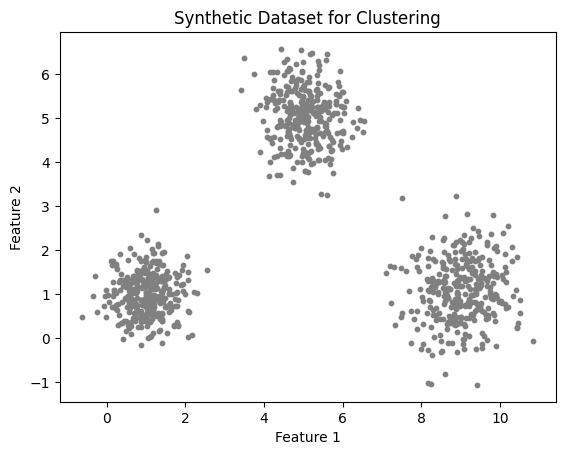

K-Means Silhouette Score: 0.81


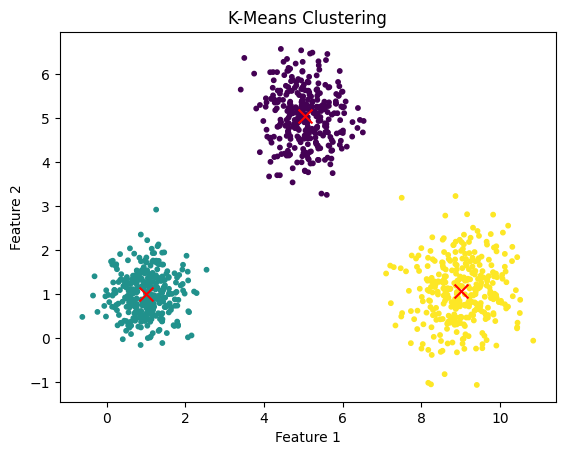

DBSCAN Silhouette Score: 0.81


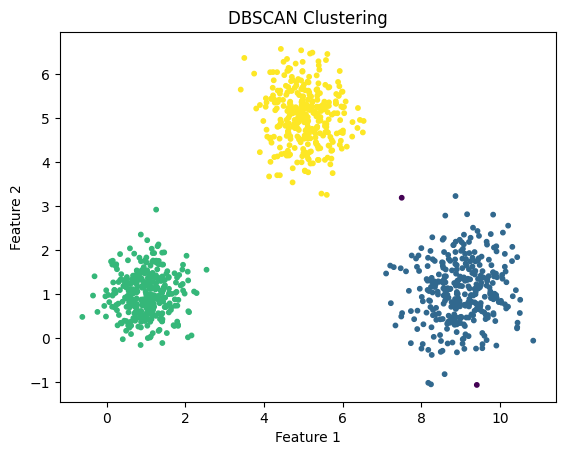

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Step 1: Generate Synthetic Dataset
n_samples = 1000
centers = [[1, 1], [5, 5], [9, 1]]
cluster_std = [0.5, 0.6, 0.7]

# Create dataset
X, y = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=42)

# Save the dataset (optional)
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['cluster'] = y
df.to_csv('clustering_dataset.csv', index=False)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c='gray', s=10)
plt.title("Synthetic Dataset for Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Step 2: K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Evaluate K-Means with silhouette score
kmeans_silhouette = silhouette_score(X, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.2f}")

# Visualize K-Means Clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100)
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Step 3: DBSCAN Clustering
dbscan = DBSCAN(eps=0.8, min_samples=10)
dbscan_labels = dbscan.fit_predict(X)

# Evaluate DBSCAN with silhouette score (excluding noise points)
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(X[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.2f}")
else:
    print("DBSCAN did not produce any clusters.")

# Visualize DBSCAN Clusters
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=10)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Performing K-Means Clustering:


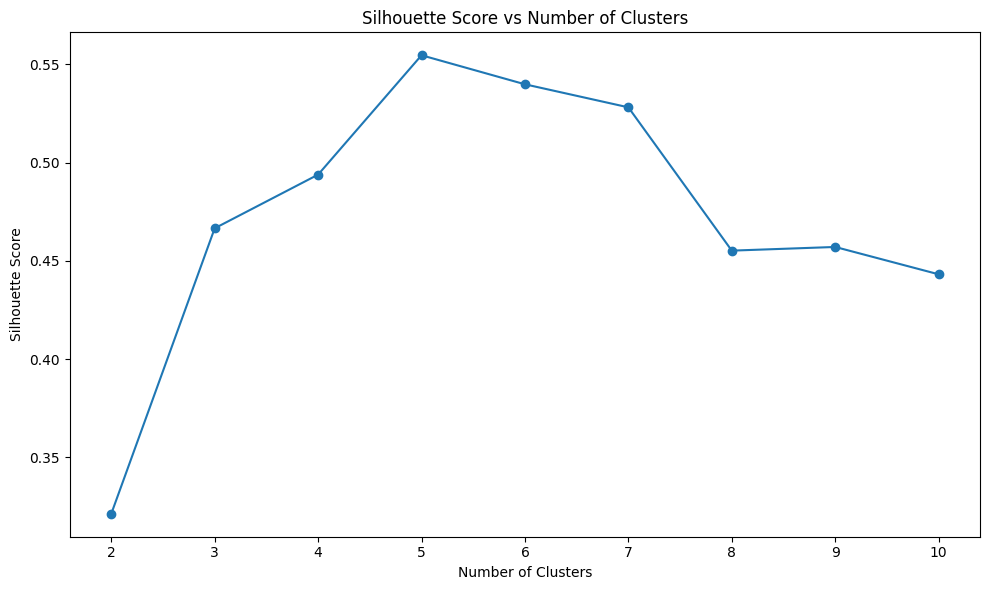

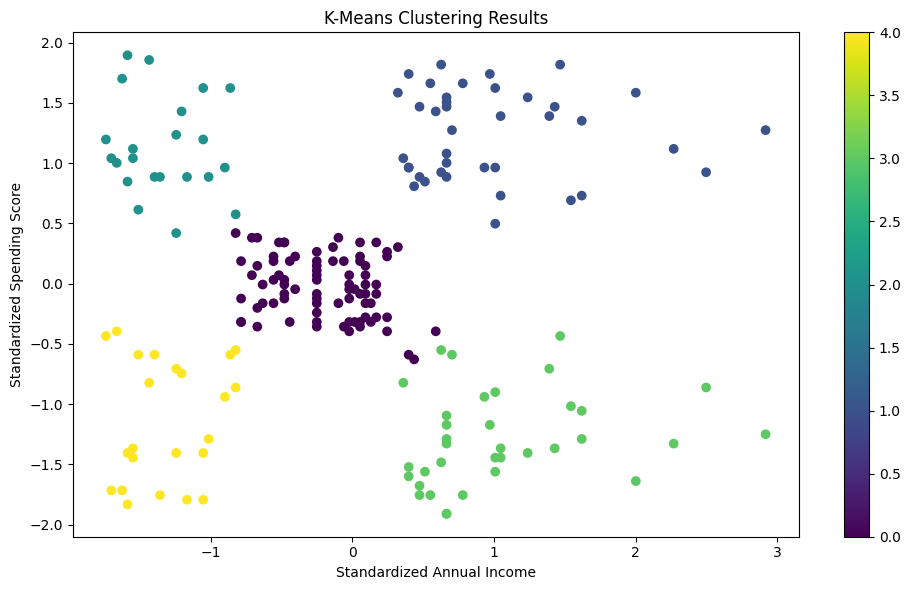

K-Means Cluster Characteristics:
                Annual Income (k$)  Spending Score (1-100)
KMeans_Cluster                                            
0                        55.296296               49.518519
1                        86.538462               82.128205
2                        25.727273               79.363636
3                        88.200000               17.114286
4                        26.304348               20.913043

Performing DBSCAN Clustering:


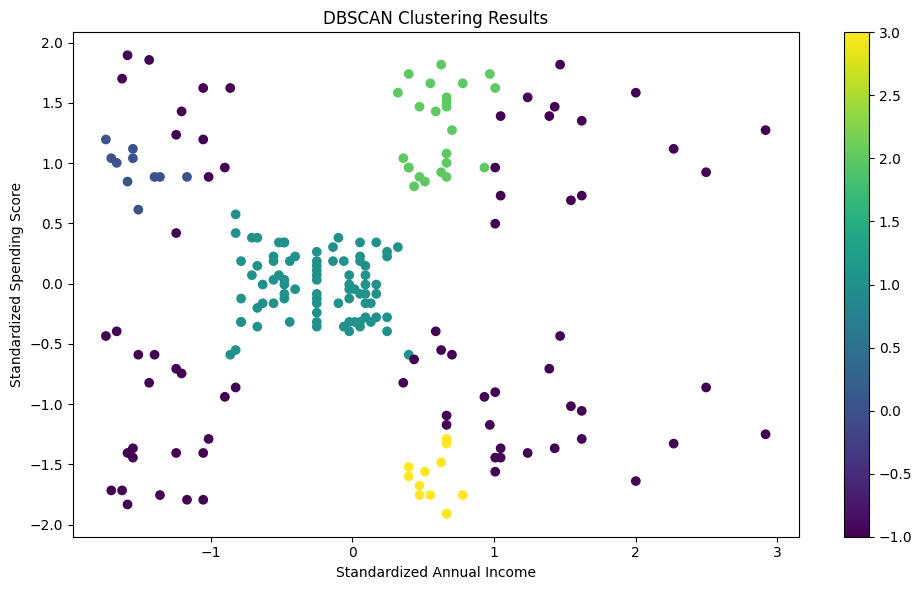


DBSCAN Clustering Parameters: eps=0.30, min_samples=7
DBSCAN Cluster Characteristics:
                Annual Income (k$)  Spending Score (1-100)
DBSCAN_Cluster                                            
0                        20.700000               74.700000
1                        54.231707               49.670732
2                        76.458333               83.333333
3                        75.583333                8.250000

Cluster Point Counts:
DBSCAN_Cluster
 1    82
-1    72
 2    24
 3    12
 0    10
Name: count, dtype: int64


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Select features for clustering
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to plot clustering results
def plot_clusters(X, labels, title, algorithm_name):
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.colorbar(scatter)
    plt.xlabel('Standardized Annual Income')
    plt.ylabel('Standardized Spending Score')
    plt.title(f'{algorithm_name} Clustering Results')
    plt.tight_layout()
    plt.show()

# K-Means Clustering
def kmeans_clustering(X_scaled):
    # Determine optimal number of clusters using silhouette score
    max_clusters = 10
    silhouette_scores = []
    
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, labels)
        silhouette_scores.append(score)
    
    # Plot silhouette scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs Number of Clusters')
    plt.tight_layout()
    plt.show()
    
    # Choose optimal number of clusters (highest silhouette score)
    optimal_clusters = np.argmax(silhouette_scores) + 2
    
    # Perform K-Means with optimal clusters
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    
    # Plot results
    plot_clusters(X_scaled, labels, 'K-Means Clustering', 'K-Means')
    
    # Cluster characteristics
    df_clustered = df.copy()
    df_clustered['KMeans_Cluster'] = labels
    cluster_summary = df_clustered.groupby('KMeans_Cluster')[features].mean()
    print("K-Means Cluster Characteristics:")
    print(cluster_summary)
    
    return labels, optimal_clusters

# DBSCAN Clustering
def dbscan_clustering(X_scaled):
    # Grid search for optimal eps and min_samples
    eps_range = np.linspace(0.1, 2, 20)
    min_samples_range = range(2, 10)
    best_silhouette = -1
    best_eps = 0
    best_min_samples = 0
    best_labels = None
    
    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            try:
                labels = dbscan.fit_predict(X_scaled)
                # Exclude noise points from silhouette calculation
                mask = labels != -1
                if np.sum(mask) > 1:
                    score = silhouette_score(X_scaled[mask], labels[mask])
                    if score > best_silhouette:
                        best_silhouette = score
                        best_eps = eps
                        best_min_samples = min_samples
                        best_labels = labels
            except:
                continue
    
    # Perform DBSCAN with best parameters
    dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
    labels = dbscan.fit_predict(X_scaled)
    
    # Plot results
    plot_clusters(X_scaled, labels, 'DBSCAN Clustering', 'DBSCAN')
    
    # Cluster characteristics
    df_clustered = df.copy()
    df_clustered['DBSCAN_Cluster'] = labels
    
    # Exclude noise points
    valid_clusters = df_clustered[df_clustered['DBSCAN_Cluster'] != -1]
    cluster_summary = valid_clusters.groupby('DBSCAN_Cluster')[features].mean()
    print(f"\nDBSCAN Clustering Parameters: eps={best_eps:.2f}, min_samples={best_min_samples}")
    print("DBSCAN Cluster Characteristics:")
    print(cluster_summary)
    
    # Count of points in each cluster
    cluster_counts = df_clustered['DBSCAN_Cluster'].value_counts()
    print("\nCluster Point Counts:")
    print(cluster_counts)
    
    return labels

# Perform clustering
print("Performing K-Means Clustering:")
kmeans_labels, n_clusters = kmeans_clustering(X_scaled)

print("\nPerforming DBSCAN Clustering:")
dbscan_labels = dbscan_clustering(X_scaled)